## Subtask #2: Machine learning to predict message sentiment
- Use all available information as features and try to learn to predict the sentiment label with a supervised machine learning model
- Do use given features, but feel free to compute additional features from the graph structure
- Play with different ML models (in sklearn)
<br></br>
Statistical comparison of models/results
- Determine if one model is statistically dsignificantly better than another
- Pick a suitable statistical test and apply it!

In [20]:
import warnings
import sklearn
import os

warnings.filterwarnings("ignore")

In [21]:
from google.colab import drive
drive.mount('/content/drive')

#df=pd.read_csv('/home/soc-redditHyperlinks-body.tsv',sep='\t')
os.chdir("/content/drive/MyDrive/Colab Notebooks/")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 data2file.txt				   rating.csv
 DUMMYfinal_project_subtask2-DUMMY.ipynb   soc-redditHyperlinks-body-test.tsv
 final_project_preliminary.ipynb	   soc-redditHyperlinks-body.tsv
 final_project_subtask1.ipynb		   test.ipynb
 final_project_subtask2.ipynb		   Untitled
'Kopie von node2vec_movielens'


### Training Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#load the data
#df_train = pd.read_csv('/home/ds2_files/soc-redditHyperlinks-body.tsv',sep='\t')
df_train = pd.read_csv('soc-redditHyperlinks-body.tsv',sep='\t')
#df_train = df_train[:100000] #for faster execution: split the training data into the first 100,000 rows

#preprocess the data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train["PROPERTIES"])
y_train = df_train["LINK_SENTIMENT"]

#train the model
#model = LogisticRegression()
model_input = int(input("Choose your model: 1=LogisticRegression, 2=MultinomialNB, 3=DecisionTreeClassifier, 4=RandomForestClassifier\n"))
if model_input==1:
    print("LogisticRegression")
    model=LogisticRegression()
elif model_input==2:
    print("MultinomialNB")
    model=MultinomialNB()
elif model_input==3:
    print("DecisionTreeClassifier")
    model=DecisionTreeClassifier()
elif model_input==4:
    print("RandomForestClassifier")
    model=RandomForestClassifier()
model.fit(X_train, y_train)

print()

#predict sentiments
y_pred = model.predict(X_train)
print(y_pred)

Choose your model: 1=LogisticRegression, 2=MultinomialNB, 3=DecisionTreeClassifier, 4=RandomForestClassifier
3
DecisionTreeClassifier


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("accuracy:", accuracy_score(y_train, y_pred))
print("precision:", precision_score(y_train, y_pred))
print("recall:", recall_score(y_train, y_pred))
print("f1 score:", f1_score(y_train, y_pred))

accuracy: 0.9557042498632627
precision: 0.9556597474447306
recall: 0.9985203584872391
f1 score: 0.9766200266942607


### Test Data

In [24]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#load the data
df_test = pd.read_csv('soc-redditHyperlinks-body-test.tsv',sep='\t')

#preprocess the data
vectorizer = CountVectorizer()
X_test = vectorizer.fit_transform(df_test["PROPERTIES"].values)
y_test = df_test["LINK_SENTIMENT"].values

#train the model
#model = LogisticRegression()
model_input = int(input("Choose your model: 1=LogisticRegression, 2=MultinomialNB, 3=DecisionTreeClassifier, 4=RandomForestClassifier\n"))
if model_input==1:
    print("LogisticRegression")
    model=LogisticRegression()
elif model_input==2:
    print("MultinomialNB")
    model=MultinomialNB()
elif model_input==3:
    print("DecisionTreeClassifier")
    model=DecisionTreeClassifier()
elif model_input==4:
    print("RandomForestClassifier")
    model=RandomForestClassifier()

#train the model
#model = LogisticRegression()
model.fit(X_test, y_test)

#evaluate the model
#score = model.score(X_test, y_test)
#print("Accuracy:", score)

#predict sentiments
y_pred = model.predict(X_test)
print(y_pred)

print(df_test.shape)

#write data to file
#with open('data2file.txt', 'a') as file:
    #file.write(f'\nShape of the test data: {df_test.shape}')
    #file.write('\n\n******************************************************************************************************************\n\n')

Choose your model: 1=LogisticRegression, 2=MultinomialNB, 3=DecisionTreeClassifier, 4=RandomForestClassifier
1
LogisticRegression
[1 1 1 ... 1 1 1]
(4999, 6)


In [ ]:
# Calculate other scores
accuracy = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')
precision = cross_val_score(model, X_test, y_test, cv=5, scoring='precision')
recall = cross_val_score(model, X_test, y_test, cv=5, scoring='recall')
f1 = cross_val_score(model, X_test, y_test, cv=5, scoring='f1')

# Print the cross validation scores
print("CV Acurracy Scores:", accuracy)
print("CV Precision Scores:", precision)
print("CV Recall Scores:", recall)
print("CV F1 score Scores:", f1)

print()

#print the scores from the cv results
print("Acurracy:", np.mean(accuracy))
print("Precision:", np.mean(precision))
print("Recall:", np.mean(recall))
print("F1 score:", np.mean(f1))

CV Acurracy Scores: [0.924      0.924      0.924      0.924      0.92192192]
CV Precision Scores: [0.924      0.924      0.92392392 0.92392392 0.92462312]
CV Recall Scores: [1.         1.         1.         1.         0.99674973]
CV F1 score Scores: [0.96049896 0.96049896 0.96045786 0.96045786 0.95933264]

Acurracy: 0.9235843843843844
Precision: 0.9240941926851475
Recall: 0.9993499458288191
F1 score: 0.9602492543923686


#### Check whether predictions are correct

In [ ]:
#array erstellen, das vorhersagbare werte enthält
y_pred = model.predict(X_test)

#erstellt ein array mit boolean-werten, ob modell jeden passagier korrekt vorhergesagt hat
y_test == y_pred

#anzahl der true-werte ausgeben über sum()
print((y_test==y_pred).sum())
#ergebnis: 714 => modell macht korrekte vorhersage

#korrekte prozentzahl ausgeben durch teilen durch alle passagiere dank y.shape[0]
#ergebnis: unser 'accuracy score'
print((y_test==y_pred).sum() / y_test.shape[0]) #relate to the term paper (max count in y_test.shape is: 4999)

4989
0.997999599919984


#### Predicting with scores

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#current threshold: 0.5
model.predict_proba(X_test)

#try threshold: 0.5, 0.6, 0.7, 0.4, 0.1, 0.01, 1e-8, 1e-20, 1e-1000
threshold = float(input("Enter a threshold value between 0.0 and 0.9 ..."))

#choose a new threshold: 0.75
y_pred = model.predict_proba(X_test)[:,1] > threshold

#make new prediction via precision und recall
print('precision:', precision_score(y_test, y_pred, average='micro'))
print('recall:', recall_score(y_test, y_pred, average='micro'))

#write data to file
#with open('data2file.txt', 'a') as file:
    #file.write(f'threshold value: {threshold}\n')
    #file.write(f"precision: {precision_score(y_test, y_pred, average='micro')}\n")
    #file.write(f"recall: {recall_score(y_test, y_pred, average='micro')}")

Enter a threshold value between 0.0 and 0.9 ...0.5
precision: 0.9219843968793758
recall: 0.9219843968793758


#### Find the best fitting line

In [ ]:
#select the best fitting line using the coefficients .coef_ and intercept_
#the result is the equation for the equation line: Wert1*x + Wert2 *y + Wert3
print(model.coef_, model.intercept_)

AttributeError: ignored

#### Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       382
           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00      4617

    accuracy                           0.92      4999
   macro avg       0.33      0.33      0.33      4999
weighted avg       0.92      0.92      0.92      4999



#### Confusion Matrix

<Axes: >

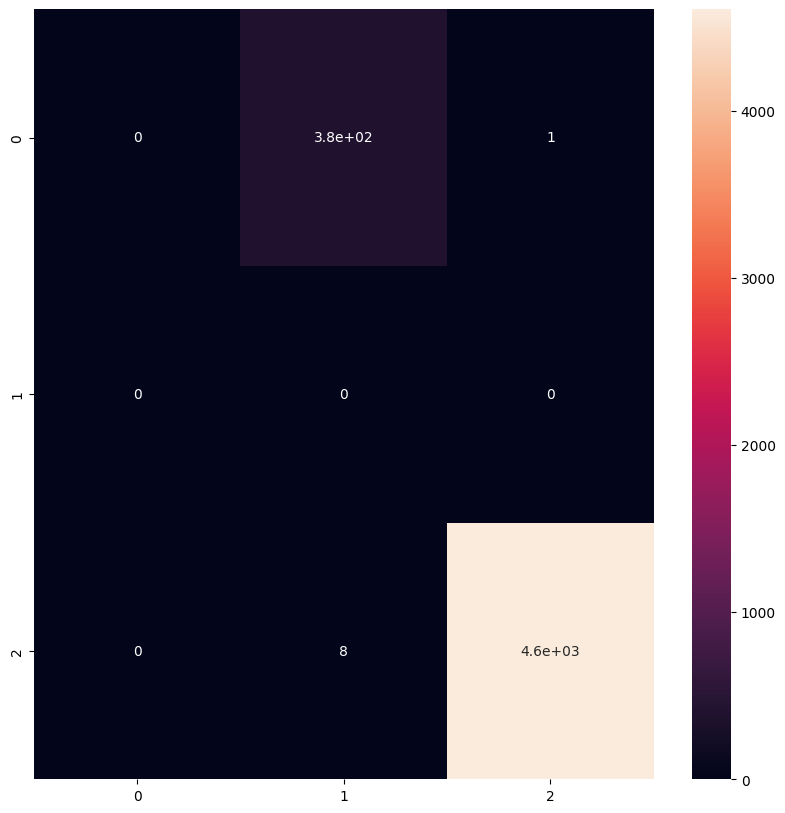

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = pd.DataFrame(data=confusion_matrix(y_true=y_test, y_pred=y_pred))

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, annot_kws={'size': 10}, ax=ax)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = pd.DataFrame(data=confusion_matrix(y_true=y_test, y_pred=y_pred),
                        index=["Actual Negative", "Actual Positive"],
                        columns=["Predicted Negative", "Predicted Positive"])

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, annot_kws={'size': 10}, ax=ax)


ValueError: ignored

#### Applying K-fold cross-validation

In [ ]:
#with open("data2file.txt", "a") as file:
    #file.write('******************************************************************************************************************')

In [ ]:
from sklearn.model_selection import KFold


#k-fold: 5, 3, 10, 20, 15, 8, 11, 9, 10
n_splits = int(input("Please enter a kfold value (standard=5)..."))
kf = KFold(n_splits, shuffle=True)

def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    return f"accuracy: {np.mean(accuracy_scores)}\nprecision: {np.mean(precision_scores)}\nrecall: {np.mean(recall_scores)}\nf1 score: {np.mean(f1_scores)}"

score = score_model(X_test, y_test, kf)
print(score)

#write data to file
#with open("data2file.txt", "a") as file:
    #file.write(f"kfold value: {n_splits}\n")
    #file.write("kfold metrics:\n")
    #file.write(str(score) + "\n\n")


Please enter a kfold value (standard=5)...5
accuracy: 0.921586986986987
precision: 0.9331699016379152
recall: 0.985702853654654
f1 score: 0.9586980369965661


In [ ]:
#with open("data2file.txt", "a") as file:
  #file.write(3*'******************************************************************************************************************\n')

#### Implementing Grid Search: finding the best parameters

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#load the data
#df_train = pd.read_csv('/home/ds2_files/soc-redditHyperlinks-body.tsv',sep='\t')
df_train = pd.read_csv('soc-redditHyperlinks-body.tsv',sep='\t')

#preprocess the data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train["PROPERTIES"])
y_train = df_train["LINK_SENTIMENT"]

In [ ]:
from sklearn.model_selection import GridSearchCV

if model_input==3:
    #parameters for decision trees
    parameters = {
        "max_depth": [5, 15, 25],
        "min_samples_leaf": [1, 3],
        "max_leaf_nodes": [10, 20, 35, 50],
    }
elif model_input==2:
    # parameters for MultinomialNB
    parameters = {
        "alpha": [0.1, 1.0, 10.0],
        "fit_prior": [True, False],
        "class_prior": [[0.5, 0.5], [0.6, 0.4], [0.7, 0.3]],
    }
elif model_input==4:
    parameters = {
        'n_estimators': [10, 25, 50, 75, 100],
    }
    #'max_features': [10, 20, 30, 40] #4 werte zustätzlich schafft laptop nicht mehr
else:
    parameters = {
      "C": np.linspace(0.1, 10, 10),
      "penalty": ["l1", "l2"],
      }

#create a grid search object
grid_search = GridSearchCV(model, parameters, cv=5)

#fit the grid search object to the data
grid_search.fit(X_train, y_train)

#print the best parameters
print(grid_search.best_params_)

#print the best score
print(grid_search.best_score_)


In [ ]:
if model_input==4:
    scores = grid_search.cv_results_['mean_test_score']
    print(scores)

NameError: ignored

In [ ]:
#ergebnisse von zuvor dann über matplotlib als graph darstellen
import matplotlib.pyplot as plt

scores = grid_search.cv_results_['mean_test_score']

plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

#ergebnis: bestes modell bei n_estimators=33 und =64
#dennoch: lieber möglichst kleinen wert nahe an bester performance nehmen
#=> bei 10 noch performant (siehe graph)
#also: optimum=10 trees

NameError: ignored

<hr style="border-top: 1px solid"></hr>

### Significance tests

#### T-Test
C:\Users\Simon\data_science02\vorlesung05\evaluation.ipynb

In [ ]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(y_pred, y_test)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 0.07537438732209384
P-value: 0.939918345521451


#### Wilcoxon

In [ ]:
#perform a Wilcoxon signed-rank test on the predicted and actual sentiments
from scipy.stats import wilcoxon

w_statistic, p_value = wilcoxon(y_pred, y_test)

print(f"Wilcoxon signed-rank test: T-statistic: {w_statistic}")
print(f"P-value: {p_value}")

Wilcoxon signed-rank test: T-statistic: 22.0
P-value: 0.5270892568655381


#### Mann-Whitney U test

In [ ]:
#perform a Mann-Whitney U test on the predicted and actual sentiments
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(y_pred, y_test)

print(f"Mann-Whitney U test: T-statistic: {u_statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U test: T-statistic: 12499999.5
P-value: 0.939919853072483


#### F-test

In [ ]:
#perform an F-test on the predicted and actual sentiments
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(y_pred, y_test)

print(f"F-test: T-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-test: T-statistic: 0.005681298264180369
P-value: 0.9399183455217838
